# Air Pollution Prediction (Use Case) - SENEM AKTAŞ

# 1- Read And Examine Dataset CSV 

### 1-A: Reading Dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn
#df = pd.read_csv("pollution.csv", parse_dates=True, index_col = "hour")

df= pd.read_csv("pollution.csv") # reading csv which include our dataset
print(df.shape)  #shape of the dataset - number of rows and columns

df #reading dataset and print to screen

(43824, 13)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


### Plot the "pm2.5: PM2.5 concentration (pollution)" column. We need to look them and predict future air pollution. Data that looks pretty busy with some big spikes. 

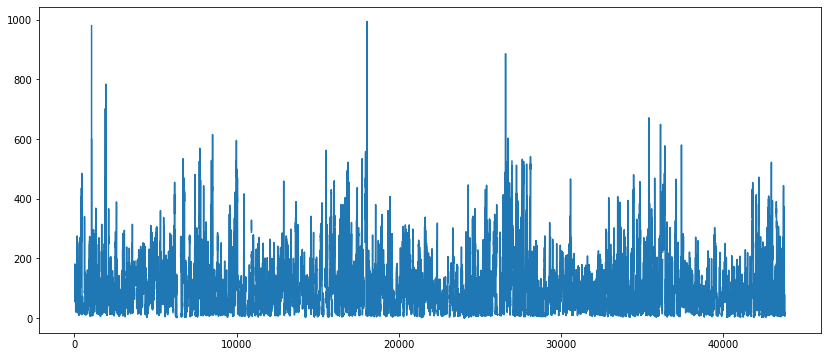

In [7]:
df['pm2.5'].plot(figsize=(14, 6))

### Plot all the other columns as well in a plot to examine the curves of all of them at the same time.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7780398dd0>,
      dtype=object)

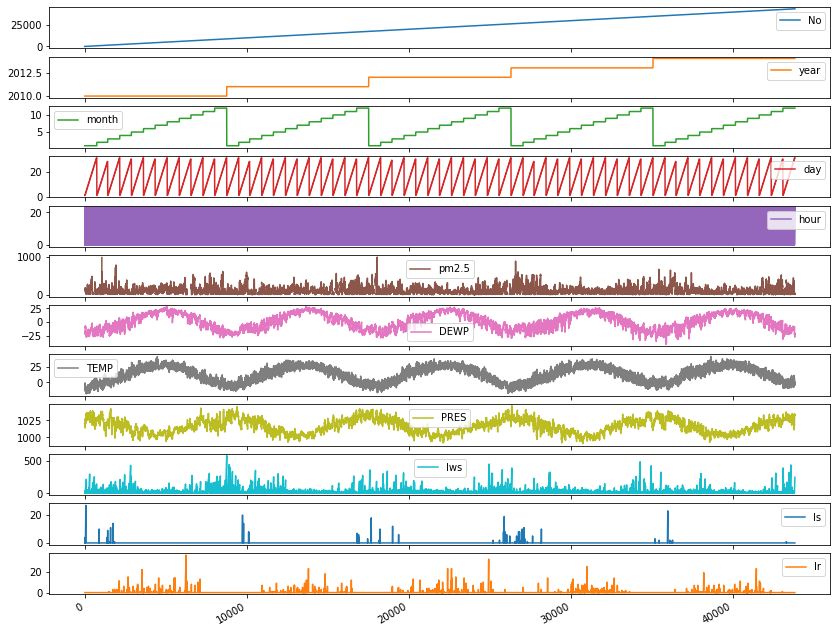

In [21]:
df.plot(subplots=True, figsize=(14,12))

# 2- Preprocessing Dataset

### We can see that the dataset looks like time series data as it has day hour month and year. So, we convert these columns into a timestamp

In [11]:
import datetime

df['hour'] = df['hour'].replace(24,0)
df['DateTime'] = df[['year', 'month', 'day', 'hour']].apply(lambda s : datetime.datetime(*s),axis = 1)
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['DateTime'] = df.DateTime.values.astype(np.int64) // 10 ** 9

df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,DateTime
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,1262304000
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,1262307600
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,1262311200
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,1262314800
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,1262318400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,1420052400
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,1420056000
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,1420059600
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,1420063200


### We maintain "DateTime" column in the previous block. Now we can remove the unwanted columns. Removing 'No' column, as it is not relevant.

In [13]:
try:
  df.drop('No',axis = 1,inplace= True)
  df.drop('year',axis = 1,inplace= True)
  df.drop('month',axis = 1,inplace= True)
  df.drop('day',axis = 1,inplace= True)
  df.drop('hour',axis = 1,inplace= True)
  print(df.shape)
except:
  print(df.shape)
  #print("Already Done")

df = df.sort_values(by='DateTime',ascending=True)

df.head(3)

(43824, 9)


,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,DateTime
0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,1262304000
1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,1262307600
2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,1262311200


### Calculation Null Values- As a result, we could see there are 2067 NA values for pm2.5 column. This column is our target column. Because of its importance we should not remove easily Null values.

In [14]:
print("Null values:\n\n",df.isnull().sum())
#Remvoing Null values
#df = df.dropna()
#print("\nNull values:\n\n",df.isnull().sum())

Null values:

 pm2.5       2067
DEWP           0
TEMP           0
PRES           0
cbwd           0
Iws            0
Is             0
Ir             0
DateTime       0
dtype: int64


# na degerlerini isle---------------------------------------------------

### Finding and Removing Outliers- neden bunu yapmalıyız

In [15]:
print("Shape of dataframe before removing outliers",df.shape)

Q1=df['pm2.5'].quantile(0.25)
Q3=df['pm2.5'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR

df = df[df['pm2.5'] < Upper_Whisker]

print("\nShape of dataframe after removing outliers",df.shape)

Shape of dataframe before removing outliers (43824, 9)

Shape of dataframe after removing outliers (39960, 9)


### Checking correlations between the independent variables- neden

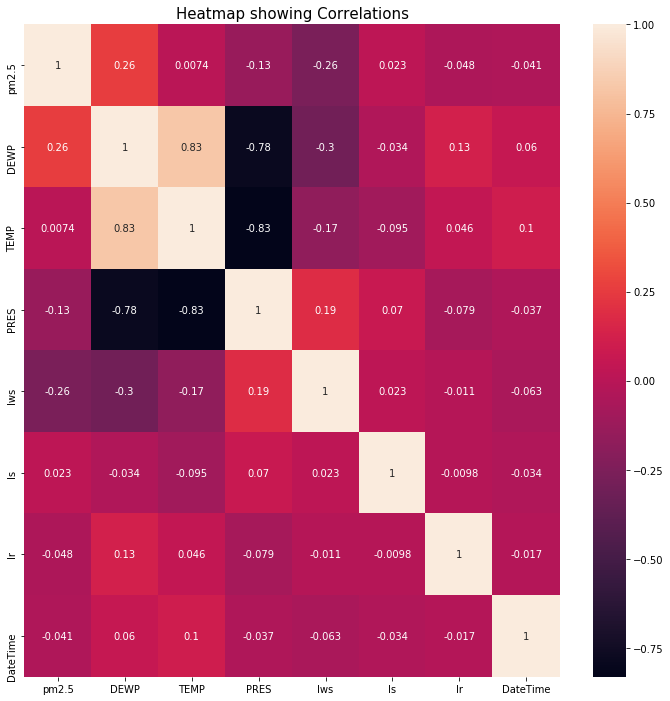

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,DateTime
pm2.5,1.000000,0.261412,0.007374,-0.131095,-0.264134,0.023132,-0.047828,-0.040623
DEWP,0.261412,1.000000,0.826731,-0.781156,-0.299323,-0.034476,0.125257,0.060048
TEMP,0.007374,0.826731,1.000000,-0.830856,-0.165933,-0.095418,0.046297,0.099778
PRES,-0.131095,-0.781156,-0.830856,1.000000,0.188629,0.070401,-0.079353,-0.037046
Iws,-0.264134,-0.299323,-0.165933,0.188629,1.000000,0.022917,-0.011262,-0.063077
Is,0.023132,-0.034476,-0.095418,0.070401,0.022917,1.000000,-0.009771,-0.034213
Ir,-0.047828,0.125257,0.046297,-0.079353,-0.011262,-0.009771,1.000000,-0.017101
DateTime,-0.040623,0.060048,0.099778,-0.037046,-0.063077,-0.034213,-0.017101,1.000000


In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap showing Correlations',size=15)
plt.show()

df.corr()

### Visualisaiton The Last Dataset and see how it looks

In [8]:
!pip install P4J

     |████████████████████████████████| 510 kB 42 kB/s eta 0:00:01
  Created wheel for P4J: filename=P4J-0.27-cp37-cp37m-linux_x86_64.whl size=1452005 sha256=91dee07138db8f0c63bb76943e9b04140e3ed968c80bfe934fa1eb8a7eced312
  Stored in directory: /home/sidney/.cache/pip/wheels/87/74/86/60f6b49a45802917f989d8f980d93bb39b39d1ce1ab702c107
Successfully built P4J


In [9]:
from __future__ import division
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
import P4J
print("P4J version:")
print(P4J.__version__)

P4J version:
0.27


### Split Dataset into training and test data

In [ ]:
from sklearn.model_selection import train_test_split

# input columns
X = df[["x", "y", "qom"]]
#X=X.to_numpy()

# Column to predict-output
y = df[['pm2.5']]  
#y=y.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 3- Machine Learninig Model

In [ ]:
def build_cnn_model(activation, input_shape):
    model = Sequential()
    
    # 2 Convolution layer with Max polling
    model.add(Conv2D(32, 5, activation = activation, padding = 'same', input_shape = input_shape))
    model.add(MaxPooling2D())
    model.add(Conv2D(64, 5, activation = activation, padding = 'same', kernel_initializer = "he_normal"))
    model.add(MaxPooling2D())  
    model.add(Flatten())
    
    # 3 Full connected layer
    model.add(Dense(128, activation = activation, kernel_initializer = "he_normal"))
    model.add(Dense(54, activation = activation, kernel_initializer = "he_normal"))
    model.add(Dense(6, activation = 'softmax')) # 6 classes
    
    # summarize the model
    print(model.summary())
    return model

In [ ]:
def compile_and_fit_model(model, X_train, y_train, X_test, y_test, batch_size, n_epochs):

    # compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='sparse_categorical_crossentropy',
        metrics=['sparse_categorical_accuracy'])
    
    # define callbacks
    callbacks = [ModelCheckpoint(filepath='best_model.h5', monitor='val_sparse_categorical_accuracy', save_best_only=True)]
    
    # fit the model
    history = model.fit(x=X_train,
                        y=y_train,
                        batch_size=batch_size,
                        epochs=n_epochs,
                        verbose=1,
                        callbacks=callbacks,
                        validation_data=(X_test, y_test))
    
    return model, history

In [ ]:
# shape of the input images
input_shape = (X_train_cwt.shape[1], X_train_cwt.shape[2], X_train_cwt.shape[3])

# create cnn model
cnn_model = build_cnn_model("relu", input_shape)

In [ ]:
def plot_model_performance_curves(history):
    fig = plt.figure(figsize=(12,5))

    # plot Cross Entropy loss
    ax = fig.add_subplot(121)
    ax.plot(history.history['loss'], color='dodgerblue', label='train loss')
    ax.plot(history.history['val_loss'], color = 'deepskyblue', label='val loss')
    ax.legend()
    ax.set_title('Learning Curves')
    ax.set_ylabel('Cross Entropy')
    ax.set_xlabel('Epoch')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # plot classification accuracy
    ax = fig.add_subplot(122)
    ax.plot(history.history['sparse_categorical_accuracy'], color='dodgerblue', label='train accuracy')
    ax.plot(history.history['val_sparse_categorical_accuracy'], color = 'deepskyblue', label='val accuracy')
    ax.legend()
    ax.set_title('Accuracy Curves')
    ax.set_ylabel('Categorical Accuracy')
    ax.set_xlabel('Epoche')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout()
    plt.show()


plot_model_performance_curves(cnn_history)

### Visualisation Accuracy-Loss

# 4- Deep Learning Model

### Visualisation Accuracy-Loss

# 5- Evaluation

f1-score vs bak

In [ ]:
def create_confusion_matrix(y_pred, y_test):    
    #calculate the confusion matrix
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    
    fig, ax = plt.subplots(figsize=(7,7))
    ax.imshow(confmat, cmap=plt.cm.Blues, alpha=0.5)

    n_labels = len(LABEL_NAMES)
    ax.set_xticks(np.arange(n_labels))
    ax.set_yticks(np.arange(n_labels))
    ax.set_xticklabels(LABEL_NAMES)
    ax.set_yticklabels(LABEL_NAMES)

    # rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    # loop over data dimensions and create text annotations.
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=i, y=j, s=confmat[i, j], va='center', ha='center')
    
    # avoid that the first and last row cut in half
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    ax.set_title("Confusion Matrix")
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

# make predictions for test data
y_pred = trained_cnn_model.predict_classes(X_test_cwt)
# determine the total accuracy 
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

create_confusion_matrix(y_pred, y_test)

# 6- Result - Comments

# 7- Libraries

- pandas
- numpy
- 

links: 
- https://towardsdatascience.com/a-complete-guide-to-time-series-data-visualization-in-python-da0ddd2cfb01

notlar: 200123_CWT_Examples bak!!!